In [64]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as spi
from  statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import pacf
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [65]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [66]:
import yfinance as yf

In [73]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA


# Download the datafile from yfinance
data = yf.download("BTC-USD", period="max")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


Do we have stationnary data ?

In [74]:
result = adfuller(data)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
#we don't have stationary data

ADF Test Statistic: -1.09
5% Critical Value: -2.86
p-value: 0.72


In [75]:
data['Difference'] = np.log(data['Close']).diff().dropna() # diff for difference

In [76]:
result = adfuller(data['Difference'].dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -15.54
5% Critical Value: -2.86
p-value: 0.00


What about autocorrelation?

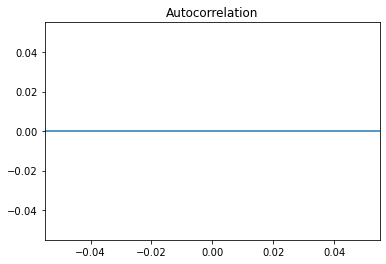

In [77]:
# Calculate the ACF (via statsmodel)
plot_acf(data['Difference'] )
# Show the data as a plot (via matplotlib)
plt.show()



In [ ]:
#since there is no autocorrelation we take the raw data to do the predicitons

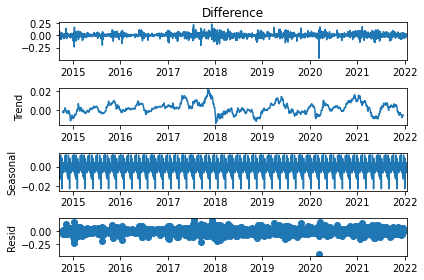

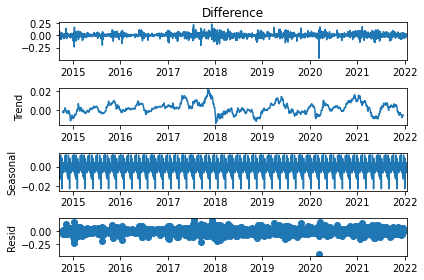

In [78]:
nresult = seasonal_decompose(data['Difference'].dropna(), freq=60)
nresult.plot()


Implement AR and MA models.

In [126]:
test=data['Difference'][:-885]
train=data['Difference'][-885:]

In [135]:
# ARMA optimization
#ARMA 1,1
model1 = ARMA(train.dropna(), order=(1,1)) #
ar1 = model.fit()
model2 = ARMA(train.dropna(), order=(1,2)) #
ar2 = model2.fit()
model3 = ARMA(train.dropna(), order=(2,1)) #
ar3 = model3.fit()
model4 = ARMA(train.dropna(), order=(0,1)) #
ar4 = model4.fit()
model5 = ARMA(train.dropna(), order=(1,0)) #
ar5 = model5.fit()
model6 = ARMA(train.dropna(), order=(3,3)) #
ar6 = model6.fit()
model7 = ARMA(train.dropna(), order=(3,2)) #
ar7 = model7.fit()
model8 = ARMA(train.dropna(), order=(3,1)) #
ar8 = model8.fit()
model9 = ARMA(train.dropna(), order=(1,3)) #
ar9 = model9.fit()
#result_df = pd.DataFrame(results)
#result_df.columns = ['(p, d, q)', 'AIC']
#Sort in ascending order, lower AIC is better
#result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)





In [159]:
def arma_comparison(data,lista,test):
    aics=[]
    models=[]
    bicsa=[]
    error=[]
    result=pd.DataFrame()
    for i in lista:
        model = ARMA(data.dropna(), order=i)
        ar= model.fit()

        models.append(ar)
        ars=ar.aic
        aics.append(ars)
        bics=ar.bic
        bicsa.append(bics)
        #start=test.index[0]
        #end=test.index[-1]
        #predictions=ar.predict(start=start,end=end)
        #rmsea=rmse(predictions,test)
        #error.append(rmsea)
    result['model']=i
    result['aic']=aics
    result['bic']=bics
    #result['rmse']=error
    result.sort_values(by='bic',ascending='False')
    print(result)
        
    


In [160]:
lista=[(1,2),(2,1)]
arma_comparison(train,lista,test)


   model          aic          bic
0      2 -3224.653340 -3200.714948
1      1 -3224.642887 -3200.714948


In [83]:
#model1 = ARMA(train.dropna(), order=(1,1))

print(ar1.aic)
print(ar2.aic)
print(ar3.aic)
print(ar4.aic)
print(ar5.aic)
print(ar6.aic)
print(ar7.aic)
print(ar8.aic)
print(ar8.aic)

-3226.547667716521
-3224.6533395311867
-3224.6428866863985
-3221.8690350597076
-3222.1531134108805
-3225.3235523400067
-3227.74633289612
-3223.649713217213
-3223.649713217213


In [ ]:
#prediction are not accurate due to the unstability of the model 

In [150]:
predictions=ar3.predict(start='2022-01-20 00:00:00',end='2022-01-24 00:00:00')

In [152]:
predictions #predictions for the next 5 days

2022-01-20    0.003071
2022-01-21    0.000442
2022-01-22    0.002509
2022-01-23    0.000869
2022-01-24    0.002169
Freq: D, dtype: float64